# Logistic Regression:

We will:
- Split the DataFrame into two parts, separating the features as **X** and the labels as **y**.
- Further divide **X** and **y** into a training dataset for training and a test dataset for evaluation.
- Train a naive classifier; we will observe that it may not perform well, but this step is important as seen in the linear regression stage.
- Analyze our results

We will import DummyClassifier and a set of functions that will allow us to calculate scores.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
# Score Calculation
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Data Separation

For X, we use `.drop()`, and for y, we select the target column, which is **is_genuine**.

In [89]:
X,y = data.drop('is_genuine', axis=1), data['is_genuine']

We verify that everything has occurred as expected.

In [90]:
X.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

We indeed have X without the target column.

In [91]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

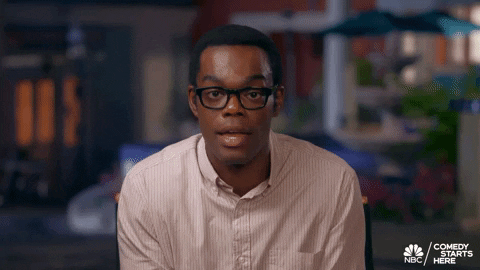

# Test train split:

The `train_test_split` function from scikit-learn returns the values of **X_train**, **X_test**, **y_train**, and **y_test** when specifying the arguments **X**, **y**, **test_size** (i.e., the percentage of data you want in the test set, e.g., 30% for test and 70% for train), and the **random_state**, which ensures that the function behaves consistently and produces the same split every time it is executed.

In [92]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Let's take a look at the shape of our variables.

In [93]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape}")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape}")

Nous avons X_train de forme (1050, 6) et y_train de forme (1050,)
Nous avons X_test de forme (450, 6) et y_test de forme (450,)


# Modeling

# Dummy Classisifier 

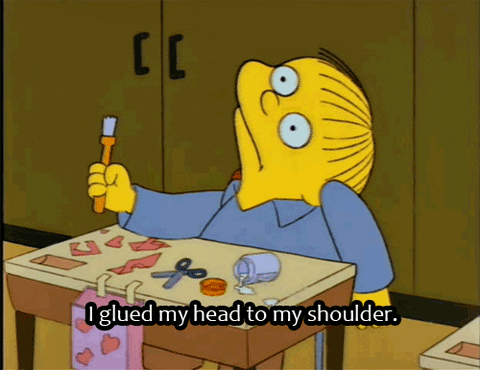

The **DummyClassifier** is a basic classifier in the scikit-learn library that allows you to create a **simple and quick classification model using strategies based on simple rules**.

Specifically, the scikit-learn **DummyClassifier** allows you to create a classification model by using a simple prediction strategy, such as predicting the **most frequent class** in the training set. It can also be used to predict a class at random or using a uniform strategy.

The **DummyClassifier** is often used as a **baseline** to evaluate the performance of more complex and sophisticated classification models. If a sophisticated classification model **cannot outperform a simple DummyClassifier**, it may indicate that the model is not well-fitted or that the dataset's features are not informative enough to predict the target class effectively.

To use the DummyClassifier, you can create it using the **DummyClassifier class from scikit-learn** and specify the desired prediction strategy, which in this case will be **most_frequent**. Then, you can train the model on the training data and evaluate it on the test data using the **fit() and predict()** methods, respectively.

In [94]:
# Instantiate the DummyClassifier object with the most_frequent strategy and store it in a variable called estimator
estimator = DummyClassifier(strategy ="most_frequent")

We will then proceed to train this estimator on the training data.

In [95]:
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

Now that the naive classifier is trained, we can proceed with predictions on X_test, resulting in y_pred.

In [96]:
y_pred= estimator.predict(X_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We can see that there are only True values in our predictions. Our classifier has returned the value that was most frequent in our target. We can demonstrate this by applying .value_counts to y_test.

In [97]:
y_test.value_counts(normalize=True)

True     0.642222
False    0.357778
Name: is_genuine, dtype: float64

We can clearly see that True represents 64% of the values in y_test.

# Score Calculation

We can calculate two scores to assess the performance of this estimator on the training and test data, which are data it hasn't seen before. We'll define train_score and test_score and call the .score() method on both the training and test sets.

In [98]:
#score sur data d'entrainement 
train_score=estimator.score(X_train,y_train).round(4)
test_score=estimator.score(X_test,y_test).round(4)

print(f"score train :{train_score} score test : {test_score}")

score train :0.6771 score test : 0.6422


We can see that the scores are very close and very close to the frequency of the appearance of the True value, which is expected. Why use a naive classifier? It allows us to:

- Validate that the data's structure is compatible with modeling.
- Establish a baseline score. We use the DummyClassifier to give us an idea of the baseline score that the simplest algorithm would achieve by making predictions.
- Confirm the proper learning of our future models. For instance, imagine that our DummyClassifier has a score of 0.55, and our Logistic Regression has a score of 0.56. There is a very small delta between them. In other words, our logistic regression model is not very good. To make this assessment, we need a baseline, as provided by the DummyClassifier.

In [99]:
# Creating a Score Function

def score ( estimator):
  # Takes an Estimator as an Argument
    
    """Calcul et print les score sur les data d'entrainement et de test """
# The body of the function is a copy-paste of the lines from the cells above
    train_score=estimator.score(X_train,y_train).round(4)
    test_score=estimator.score(X_test,y_test).round(4)
# We verify that it works correctly
    print(f"score train :{train_score} score test : {test_score}")

In [100]:
score(estimator)

score train :0.6771 score test : 0.6422


When we refer to "score," we are specifically talking about the "accuracy score," which is the ratio of the number of correct predictions to the total number of predictions.

# Confusion Matrix

Let's call the **confusion_matrix** function on **y_test** and **y_pred** and save the result in a variable **mat**.

In [101]:
mat=confusion_matrix(y_test, y_pred)

Let's display the result

In [102]:
mat

array([[  0, 161],
       [  0, 289]], dtype=int64)

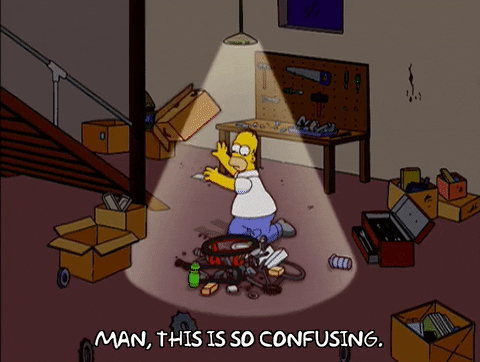

I completely agree with Homer; it's not very interpretable! Let's convert this array into a DataFrame.

In [103]:
mat = pd.DataFrame(mat)

Let's take a look at the result:

In [104]:
mat

0    1
0  0  161
1  0  289

It's better, but we can make it even better:

In [105]:
mat.columns = [f"Nombre de valeur prédites égale à {i}" for i in mat.columns]
mat.index= [f"Test est égale à {i}" for i in mat.index]
mat 

Nombre de valeur prédites égale à 0  \
Test est égale à 0                                    0   
Test est égale à 1                                    0   

                    Nombre de valeur prédites égale à 1  
Test est égale à 0                                  161  
Test est égale à 1                                  289

We can observe that:
   - There were only predictions equal to 1 (i.e., True).
   - If we divide 289 (true positives) by 450 (the total of 161+289), we get the accuracy score 0.64222.
     
   - There are 289 TP (TP: true positives, the number of samples correctly classified as belonging to class 1).
   
   - There are 0 TN (TN: true negatives, the number of samples correctly classified as not belonging to class 1).
   
   - There are 0 FN (FN: false negatives, the number of samples incorrectly classified as not belonging to class 1).
   
   - There are 161 FP (FP: false positives, the number of samples incorrectly classified as belonging to class 1).

Let's create a function called **confusion** that will allow us to display a clear and easily understandable confusion matrix.

In [106]:
def confusion (y_test, y_pred):
    """Affiche une matrice de confusion lisible"""
    mat=confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"Nombre de valeur prédites égale à {i}" for i in mat.columns]
    mat.index= [f"Test est égale à {i}" for i in mat.index]
    
    return mat

We check

In [107]:
confusion(y_test,y_pred)

Nombre de valeur prédites égale à 0  \
Test est égale à 0                                    0   
Test est égale à 1                                    0   

                    Nombre de valeur prédites égale à 1  
Test est égale à 0                                  161  
Test est égale à 1                                  289

# Logistic Regression

Let's get down to business!

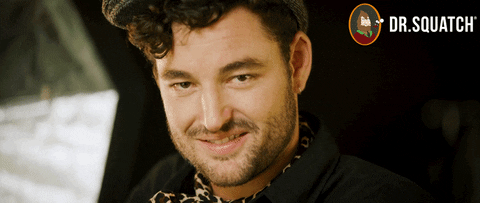

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

As a reminder, we've already split the data into training and test sets using the **train_test_split()** function, resulting in the variables **X_train, X_test, y_train**, and **y_test**. Now, we'll create an instance of the **LogisticRegression** object.

In [109]:
# Creating a LogisticRegression Object
lr = LogisticRegression()

Let's train the model...

In [110]:
lr.fit(X_train, y_train)

LogisticRegression()

And we predict the results of **X_test**, which we will save in **y_pred**.

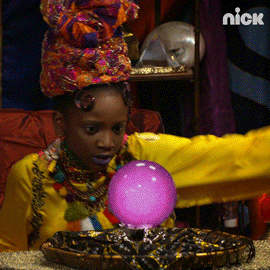

In [111]:
# Predicting the target variable values for the test set
y_pred = lr.predict(X_test)

How about displaying the confusion matrix?

In [112]:
confusion(y_test,y_pred)

Nombre de valeur prédites égale à 0  \
Test est égale à 0                                  156   
Test est égale à 1                                    1   

                    Nombre de valeur prédites égale à 1  
Test est égale à 0                                    5  
Test est égale à 1                                  288

The confusion matrix is commonly used to evaluate the performance of a binary classification model, where the model must predict whether an observation belongs to a positive or negative class. In this matrix, correct predictions are located on the main diagonal, while incorrect predictions are located outside the main diagonal.

Looking at your confusion matrix, we find our total of 450 observations in the test set. Out of these 450 observations:
- 156 were correctly predicted as actually belonging to class 0.
- 288 observations were correctly predicted as belonging to class 1.

However, there were prediction errors:
- 1 observation that belonged to class 0 was incorrectly predicted as belonging to class 1.
- 5 observations that belonged to class 1 were incorrectly predicted as belonging to class 0.

Using this confusion matrix, we can calculate various metrics to evaluate the model's performance, such as accuracy, recall, F1-score, and more.

In [113]:
# Model Performance Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.9866666666666667


In [114]:
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       161
        True       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450

